In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [230]:
# Problem 1

# int_num이 소수인지 판정하는 함수 만들기
def is_prime(int_num): # output : boolean()
    if not isinstance(int_num, int):
        return False
    
    if int_num <= 0:
        return False
    
    if int_num == 1:
        return False
    
    for d in range(2, int(np.sqrt(int_num))): #시간을 단축하기 위해 루트 int_num으로 설정
        if int_num % d == 0:                  
            return False
    
    return True


# int_num이 체인소수인지 판정하는 함수 만들기 (총 3단계)
def is_chain_prime(int_num):
    len_num = len(str(int_num))
    set_num = set(str(int_num))
    
    # First단계와 Second단계는 시간 절약에 효과적(필수적인 것은 아님)
    
    # First단계: 각 자리의 수가 2, 3, 5, 7 중 하나인지 확인
    forbidden = ['0', '1', '4', '6', '8', '9'] #합성수
    for i in forbidden:
        if i in set_num:
            return False
    
    # Second단계: 2와 5는 첫자리를 제외하고는 올 수 없음(예: 3257 --> 32, 25(합성수))
    set_num_2 = set(str(int_num)[1:])
    if '2' in set_num_2 or '5' in set_num_2:
        return False
    
    # Last단계 (일반적인 체인소수 판정법)
    list_num = list(str(int_num)) 
    for i in range(2, len_num + 1): # when i = 1은 이미 체크함 (#first 단계에서)
        for j in range(len_num - i + 1): # i자리 덩어리가 '몇(len_num - i+1)'개인지 확인
            a = int(''.join(list_num[j:j+i])) # j번째	부터 시작한 'i자리'수 덩어리 (j = index 0번째부터 시작, i = 한 자리부터 시작)
            if is_prime(a) == False:
                return False
    
    return True

In [231]:
a = 23
is_chain_prime(a)

True

In [232]:
# Problem 2

def make_student_num_list():
    student = {}
    while True:
        print('종료를 원한다면 연도에 "종료"를 입력하세요.')
        year = input("입학년도:")
        if year == "종료":
            print("종료를 입력하셨네요. 프로그램을 종료합니다.")
            return 0

        degree = input("학부/석사/박사 여부:")
        name = input("이름:")


        if degree == '학부':
            degree_num = '1'
        elif degree == '석사':
            degree_num = '2'
        elif degree == '박사':
            degree_num = '3'
        else:
            print("과정이 잘못 입력되었네요. 프로그램을 종료합니다.")
            return 0

        stu_num = year + "-" + degree_num + str(random.randrange(0,10)) + str(random.randrange(0,10)) + str(random.randrange(0,10)) + str(random.randrange(0,10))


        while stu_num in student.keys(): # 학번 중복 방지
            stu_num = year + "-" + degree_num + str(random.randrange(0,10)) + str(random.randrange(0,10)) + str(random.randrange(0,10)) + str(random.randrange(0,10))


        student[stu_num] = name
        print(student)
        
    return 0

In [233]:
make_student_num_list()

종료를 원한다면 연도에 "종료"를 입력하세요.


입학년도: 2018
학부/석사/박사 여부: 학부
이름: 홍지현


{'2018-14938': '홍지현'}
종료를 원한다면 연도에 "종료"를 입력하세요.


입학년도: 종료


종료를 입력하셨네요. 프로그램을 종료합니다.


0

In [234]:
# Problem 3 (App_store data problem)

# Preprocessing
df = pd.read_csv('app_store.csv')

def preprocessing(df):
    new_df = df.iloc[:,:2].copy()
    
    new_df['Rating'] = df['Rating']
    new_df['Reviews'] = df['Reviews']
    new_df['Installs'] = df.Installs.str.split('+').str[0].str.split(',').str.join('').astype('int')
    new_df['Log_Reviews'] = round(np.log10(new_df['Reviews']), 1) # Popularity score 1
    new_df['Log_Installs'] = round(np.log10(new_df['Installs']), 1) # Popularity score 2
    new_df['Size(M)'] = np.nan # 초기화
    
    for i in range(len(df['Size'])):
        size = df['Size'][i]
        if 'M' in size:
            new_df['Size(M)'][i] = float(size[:-1])
        if 'k' in size:
            new_df['Size(M)'][i] = float(''.join(size[:-1].split(','))) / 1024
            
    new_df['Price'] = df.Price.str.split('$').str[1].astype('float')
    new_df['is_game'] = df.Category.str[:4] == 'GAME'
    new_df['Reviews / Installs'] = new_df['Reviews'] / new_df['Installs']
    new_df['Utilities'] = new_df['Rating'] * 20 * (new_df['Price'] + 1) / 21 + new_df['Log_Reviews'] * 100 / 6 + new_df['Log_Installs'] * 100 / 7 # Total Popularity score
    
    # 아래 주석은 3-2 문제를 위한 것입니다.
    # Note : Utilities의 계산법 = Rating, Log_Reviews, Log_Installs를 각각 100점 만점으로 환원하고 더함. (총점 300점)
    # 단, 첫 번째 term은 Rating 5.0 & 가격 $20 기준 만점이다. ($20보다 비싼 앱은 만점을 초과할 수 있음.)
    # 또한, Log_Reviews는 만점을 6.0 (즉, 100만 회 리뷰가 만점), Log_Installs는 만점을 7.0 (즉, 1000만 회 설치가 만점) 으로 설정하였기에
    # 이보다 더 많이 리뷰되고, 다운로드된 앱이 있다면 Utilities 점수가 300점을 초과할 수는 있다. (하지만 본 데이터에선 그런 엄청난 인기 앱이 없음.)
    
    # [첫 번째 항에 대한 부연설명]
    # $7 & Rating 4.5인 앱 A가 있고, $1 & Rating 4.5인 앱 B가 있다고 하자. (기타 조건은 모두 동일)
    # 과연 어떤 앱이 추천되어야 하는가? 
    # 정답은 없지만, 개인적으로 $7짜리를 추천해야 한다고 생각한다.
    # 일반적으로 대다수의 사람들은 가격이 높은 유료 앱에 대해 '저항성'을 가지고 있다. 
    # 따라서 평점이 동등한 경우, 상대적으로 가격이 높은 앱에 대해 가격만큼의 가중치를 부여해야 한다고 생각한다.
    # 물론 그 영향의 정도가 Price를 단순히 '곱하는' 방식이 아닐 수는 있지만, 여기서는 편의상 위와 같이 결정했다.
    
    return new_df

df = preprocessing(df)

/Users/changyeon/python/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/changyeon/python/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [235]:
# 3-1
rating = df['Rating']

# Rating과 Category의 관계 (참고용)
categories = list(set(df['Category']))
result1 = {}
for c in categories:
    result1[c] = round(np.mean(df.loc[df['Category'] == c]['Rating']), 2)
result1 = pd.Series(result1) # 보기 편하게 pandas Series로 바꿔준다
display(result1.sort_values(ascending=False)) # 이 결과는 그래프보다 표로 보는 것이 적합하다. (x축을 담당하는 category가 값이 아닌 이름들이기 때문에)

WEATHER                4.67
NEWS_AND_MAGAZINES     4.67
AUTO_AND_VEHICLES      4.56
GAME_WORD              4.55
ART_AND_DESIGN         4.51
PERSONALIZATION        4.50
GAME_PUZZLE            4.49
SHOPPING               4.49
FINANCE                4.49
GAME_CARD              4.49
MUSIC_AND_AUDIO        4.48
GAME_STRATEGY          4.48
BOOKS_AND_REFERENCE    4.46
COMMUNICATION          4.44
BUSINESS               4.43
EDUCATION              4.42
GAME_ROLE_PLAYING      4.41
TOOLS                  4.41
HEALTH_AND_FITNESS     4.38
GAME_EDUCATIONAL       4.38
PRODUCTIVITY           4.38
GAME_BOARD             4.36
GAME_ARCADE            4.33
GAME_ADVENTURE         4.33
GAME_MUSIC             4.31
GAME_SIMULATION        4.31
MEDICAL                4.27
ENTERTAINMENT          4.27
SPORTS                 4.26
GAME_CASUAL            4.26
PHOTOGRAPHY            4.26
GAME_ACTION            4.24
GAME_RACING            4.24
MAPS_AND_NAVIGATION    4.22
LIFESTYLE              4.22
LIBRARIES_AND_DEMO  

In [236]:
# 각 column들 간의 피어슨 상관계수
df_copy = df.iloc[:, 2:5].copy()
df_copy['Size(M)'] = df['Size(M)']
df_copy['Price'] = df['Price']
df_copy['Sales'] = df['Price'] * df['Installs']
df_copy['Log_Reviews'] = df['Log_Reviews']
df_copy['Log_Installs'] = df['Log_Installs']
corr = df_copy.corr(method='pearson')
display(corr)

,Rating,Reviews,Installs,Size(M),Price,Sales,Log_Reviews,Log_Installs
Rating,1.000000,0.058658,0.035402,0.045971,-0.033268,0.032727,0.112313,0.028689
Reviews,0.058658,1.000000,0.741567,0.085282,-0.017392,0.695162,0.391132,0.344718
Installs,0.035402,0.741567,1.000000,0.066332,-0.024050,0.732387,0.351214,0.357880
Size(M),0.045971,0.085282,0.066332,1.000000,-0.013824,0.043873,0.102588,0.119458
Price,-0.033268,-0.017392,-0.024050,-0.013824,1.000000,0.025317,-0.062072,-0.086096
Sales,0.032727,0.695162,0.732387,0.043873,0.025317,1.000000,0.473369,0.468461
Log_Reviews,0.112313,0.391132,0.351214,0.102588,-0.062072,0.473369,1.000000,0.923403
Log_Installs,0.028689,0.344718,0.357880,0.119458,-0.086096,0.468461,0.923403,1.000000


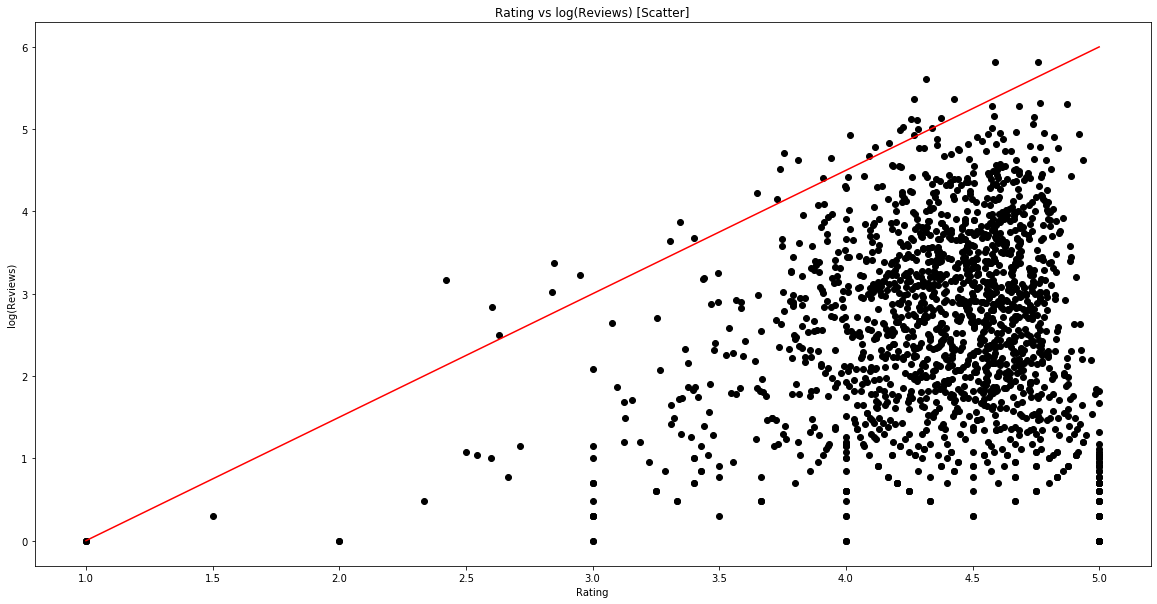

In [237]:
# Rating과 Reviews의 관계
reviews = df['Reviews']
fig = plt.figure(figsize=(20,10))
plt.scatter(rating, np.log10(reviews), c='k')
plt.plot([1,5], [0,6], color='red')
plt.title('Rating vs log(Reviews) [Scatter]')
plt.xlabel('Rating')
plt.ylabel('log(Reviews)')
plt.show()

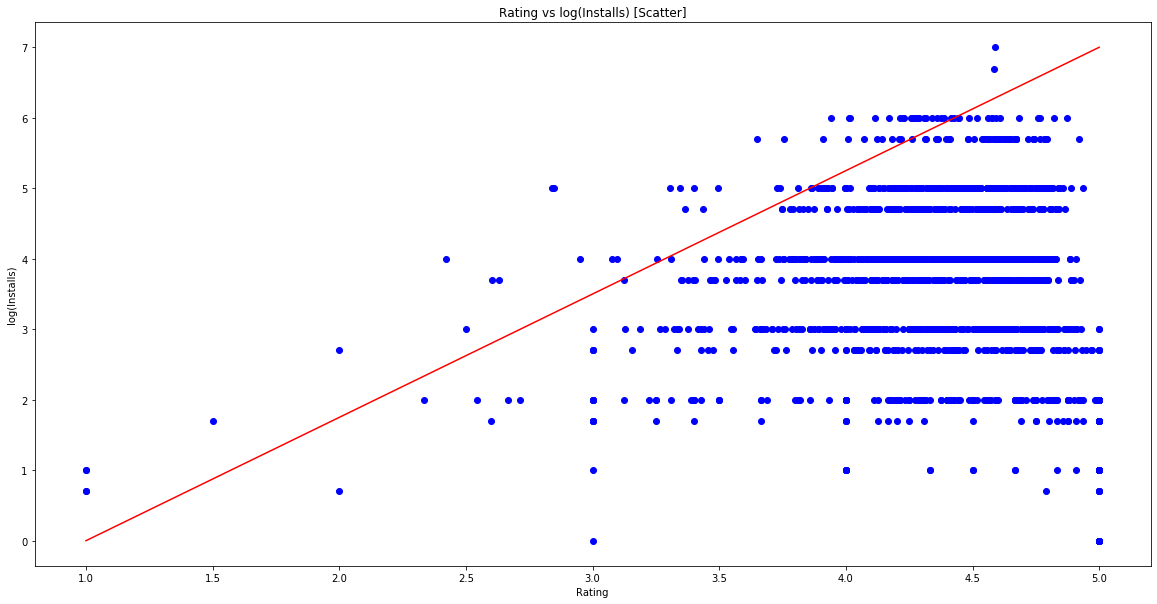

In [238]:
# Rating과 Installs의 관계
installs = df['Installs']
fig = plt.figure(figsize=(20,10))
plt.scatter(rating, np.log10(installs), c='b')
plt.plot([1,5], [0,7], color='red')
plt.title('Rating vs log(Installs) [Scatter]')
plt.xlabel('Rating')
plt.ylabel('log(Installs)')
plt.show() # Installs 데이터의 특성 상 10000이 실제로는 10000+ (즉, 1만과 5만 사이)를 의미하므로 약간의 왜곡이 있다.

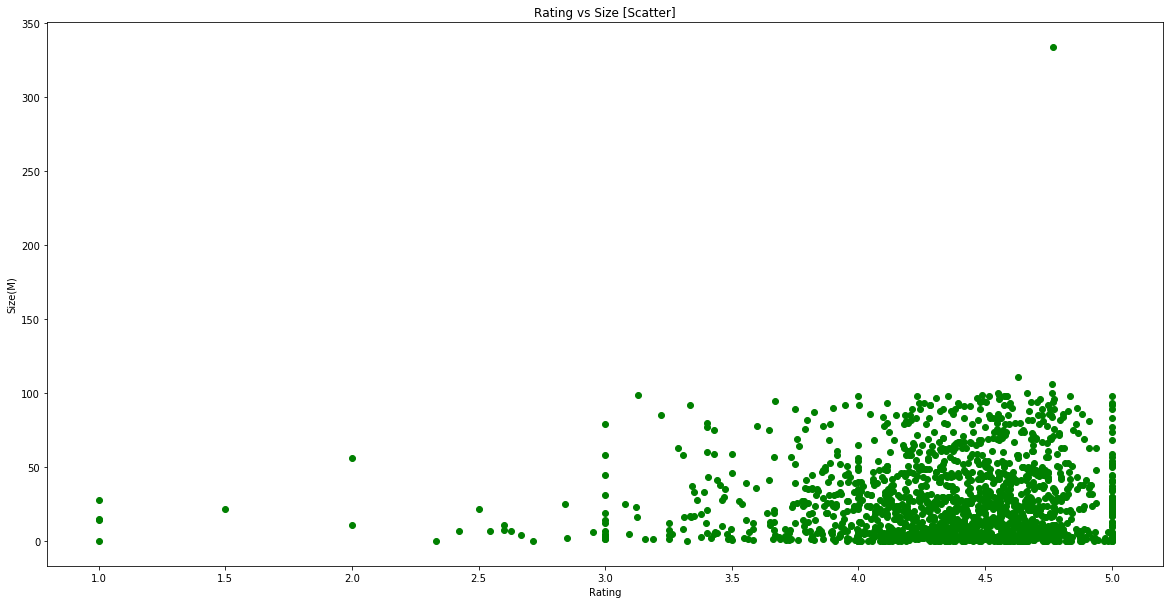

In [239]:
# Rating과 Size의 관계
size = df['Size(M)']
fig = plt.figure(figsize=(20,10))
plt.scatter(rating, size, c='g')
plt.title('Rating vs Size [Scatter]')
plt.xlabel('Rating')
plt.ylabel('Size(M)')
plt.show() 

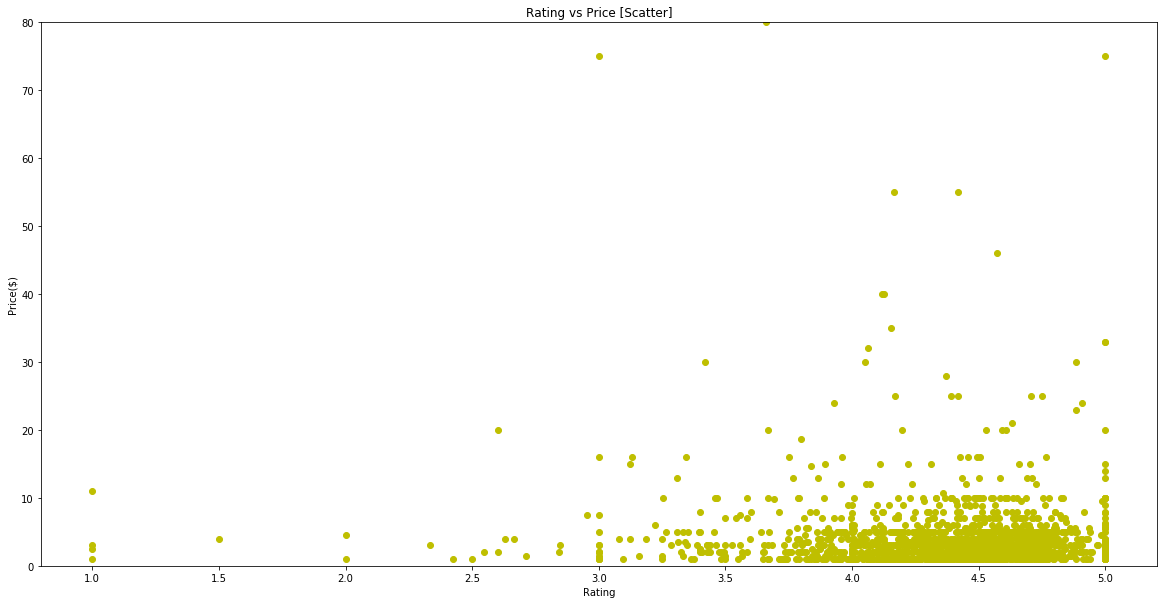

In [240]:
# Rating과 Price의 관계
price = df['Price']
fig = plt.figure(figsize=(20,10))
plt.scatter(rating, price, c='y') 
plt.title('Rating vs Price [Scatter]')
plt.ylim([0, 80])
plt.xlabel('Rating')
plt.ylabel('Price($)')
plt.show() # Price 데이터의 특성 상 10000이 실제로는 10000+ (즉, 1만과 5만 사이)를 의미하므로 약간의 왜곡이 있다.

In [241]:
# 3-2

ctg = ['GAME_ACTION', 'GAME_EDUCATIONAL', 'GAME_ADVENTURE']
new_df = df.loc[df['Rating'] >= 4.0].loc[df['Installs'] >= 10000].loc[df['Reviews / Installs'] < 1]
new_df_1 = new_df.loc[df['Category'] == ctg[0]]
new_df_2 = new_df.loc[df['Category'] == ctg[1]]
new_df_3 = new_df.loc[df['Category'] == ctg[2]]
new_df = pd.concat([new_df_1, new_df_2, new_df_3], axis=0)
#new_df.sort_values(by='Utilities', ascending=False)

In [243]:
# Solve IP
import cvxpy 

selection = cvxpy.Variable(len(new_df), boolean=True)

constraint_1 = selection @ list(new_df['Size(M)']) <= 500
constraint_2 = selection @ list(new_df['Price']) <= 20

ones = []
for _ in range(len(new_df)):
    ones.append(1)
    
constraint_3 = selection @ ones <= 10



utilities = list(new_df['Utilities'])

total_utility = utilities @ selection

problem = cvxpy.Problem(cvxpy.Maximize(total_utility), [constraint_1, constraint_2, constraint_3])
problem.solve(solver=cvxpy.GLPK_MI)

new_df['selection'] = selection.value

#display(new_df)

ans = new_df.loc[new_df['selection'] == 1]
display(ans.sort_values(by='Utilities', ascending=False))
np.sum(ans['Size(M)']), np.sum(ans['Price']), np.sum(ans['Utilities']), np.mean(ans['Utilities'])

,App Name,Category,Rating,Reviews,Installs,Log_Reviews,Log_Installs,Size(M),Price,is_game,Reviews / Installs,Utilities,selection
41,Hitman Sniper,GAME_ACTION,4.587015,653815,10000000,5.8,7.0,28.0,0.99,True,0.065381,205.360152,1.0
42,Terraria.,GAME_ADVENTURE,4.267955,234677,1000000,5.4,6.0,49.0,4.99,True,0.234677,200.061955,1.0
70,Stickman Legends: Shadow War Offline Fighting ...,GAME_ACTION,4.583939,145755,5000000,5.2,6.7,98.0,0.99,True,0.029151,191.068607,1.0
34,Five Nights at Freddy's,GAME_ACTION,4.575579,104679,1000000,5.0,6.0,50.0,2.99,True,0.104679,186.434818,1.0
996,Survivalcraft,GAME_ACTION,4.358609,64976,500000,4.8,5.7,18.0,3.99,True,0.129952,182.142343,1.0
594,Shadow of Death: Dark Knight - Stickman Fighting,GAME_ACTION,4.607677,90089,1000000,5.0,6.0,90.0,0.99,True,0.090089,177.780264,1.0
714,Dungeon Defense,GAME_ACTION,4.822846,79671,1000000,4.9,6.0,35.0,0.99,True,0.079671,176.521395,1.0
518,Lifeline,GAME_ADVENTURE,4.536405,72559,500000,4.9,5.7,15.0,1.99,True,0.145118,176.013192,1.0
74,League of Stickman - Best action game(Dreamsky),GAME_ACTION,4.361683,76296,1000000,4.9,6.0,57.0,0.99,True,0.076296,175.647381,1.0
815,Lost Journey (Dreamsky),GAME_ADVENTURE,4.484221,43350,1000000,4.6,6.0,29.0,0.99,True,0.043350,170.879620,1.0


(469.0, 19.9, 1841.9097252716474, 184.19097252716477)